# ```REGRESION EN HOUSING```

## ```PRE PROCESAMIENTO```

In [60]:
#from sklearn.cluster import KMeans
import wget
import pandas as pd

from os import path

# inicializamos un diccionario donde guardaremos el dataset
dataset = dict()
dataset['url'] = 'https://ignaciorlando.github.io/datasets/housing_pandas.csv'
dataset['extension'] = '.csv'
dataset['filename'] = 'Housing' + dataset['extension']
if not path.exists(dataset['filename']):  # descargar solamente si no existe
  wget.download(dataset['url'], dataset['filename'])
else:
  print('El archivo {} ya existe.'.format(dataset['filename']))

# accedemos a los datos usando Pandas
original_table = pd.read_table(dataset['filename'],sep=',')
original_table.head()
copy_dataset = original_table.copy()

El archivo Housing.csv ya existe.


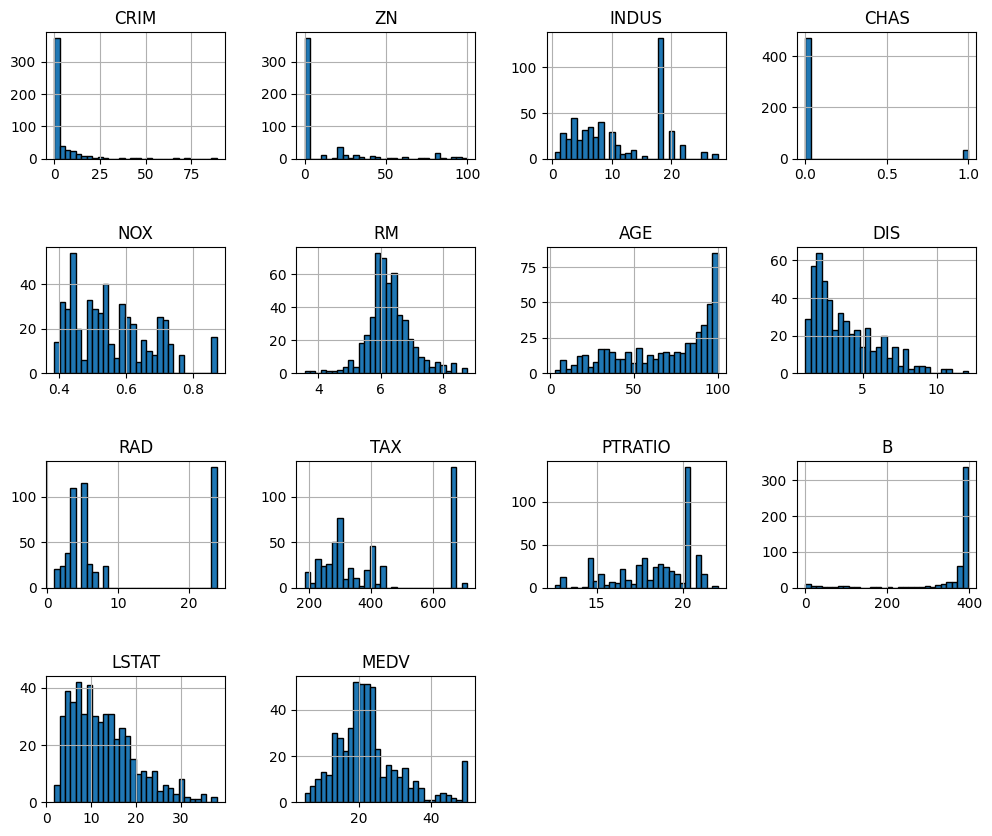

In [61]:
import matplotlib.pyplot as plt

# construimos una serie de histogramas mostrando la distribución de las features
copy_dataset.hist(figsize=(12, 10), bins=30, edgecolor="black")
plt.subplots_adjust(hspace=0.7, wspace=0.4)

In [62]:
# usamos el método describe() de los dataframes para resumir las muestras
copy_dataset.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


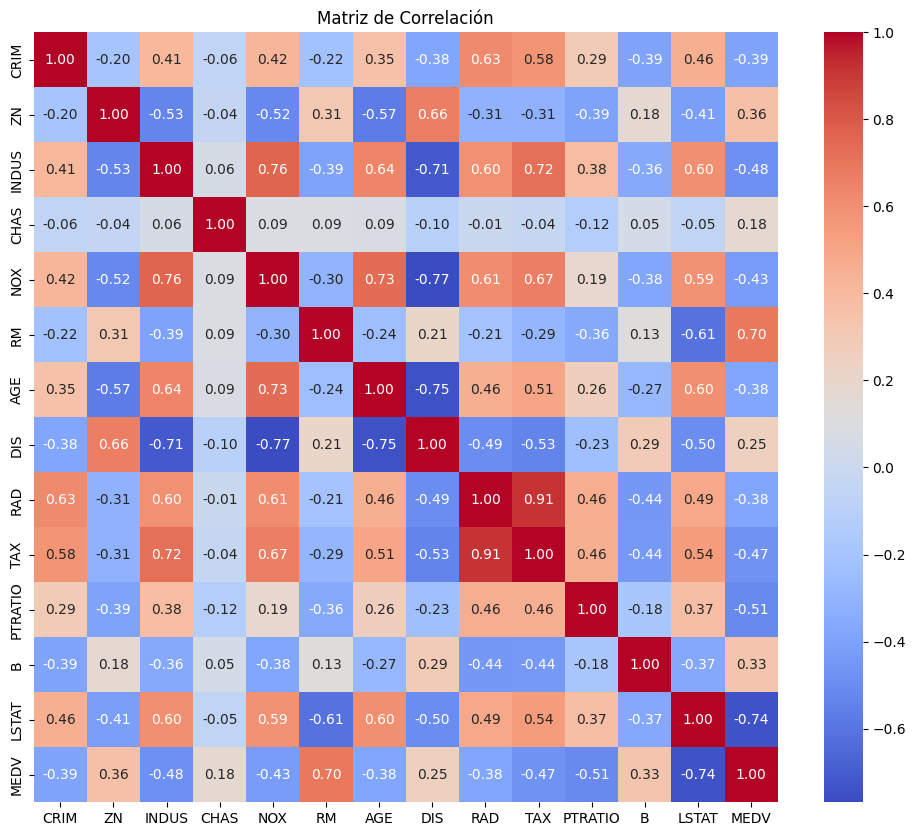

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt

# calculamos la matriz de correlación
correlation_matrix = copy_dataset.corr()
# la graficamos con un mapa de calor
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación')
plt.show()

Podriamos usar para predecir las variables LSTAT, PTRATIO, RM , que son variables con una correlacion decente con MEDV. Representan el porcentaje de habitantes de clase baja, ek promedio de alumnos y estudiantes, y el promedio de habitaciones de la vivienda.

## ```REGRESION LINEAL MULTIPLE```

### ```SELECCION LIMITADA```

In [64]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm

# Separar la variable objetivo (MedHouseVal) de las variables predictoras
X = copy_dataset.drop(['MEDV', 'B','TAX','RAD','DIS','AGE','NOX','CHAS','INDUS','ZN','CRIM'],axis=1)
y = copy_dataset['MEDV']

# Estandarizar las variables predictoras
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
# Metamoslo en un dataframe así no perdemos los nombres de las columnas
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

In [65]:
# Agregamos una constante como característica, para estimar la ordenada al origen
X_scaled_df_ = sm.add_constant(X_scaled_df)
# Ajustamos el modelo
model = sm.OLS(y, X_scaled_df_).fit()
# Imprimimos el resumen de los resultados
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.679
Model:                            OLS   Adj. R-squared:                  0.677
Method:                 Least Squares   F-statistic:                     353.3
Date:                Wed, 13 Nov 2024   Prob (F-statistic):          2.69e-123
Time:                        11:26:07   Log-Likelihood:                -1553.0
No. Observations:                 506   AIC:                             3114.
Df Residuals:                     502   BIC:                             3131.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         22.5328      0.232     96.926      0.0

p valor muy quenio lo cual e sbueno

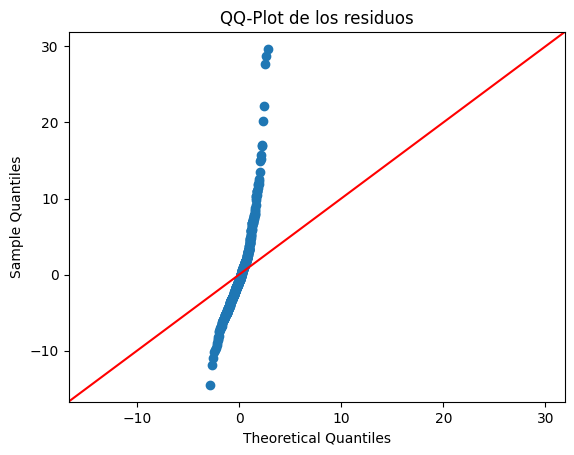

In [66]:
# QQ-Plot
sm.qqplot(model.resid, line='45')
plt.title("QQ-Plot de los residuos")
plt.show()

una cagada no es normal

In [67]:
from scipy.stats import shapiro

# aplicamos Shapiro-Wilk sobre los residuos
_, p = shapiro(model.resid)
print("p = %.4f" % (p))
# comparamos con el alpha
alpha = 0.05
if p > alpha:
    print("Se distribuyen normal (falló en rechazarse la hipótesis nula)")
else:
    print('No se distribuyen normal (se rechazó la hipótesis nula)')

p = 0.0000
No se distribuyen normal (se rechazó la hipótesis nula)


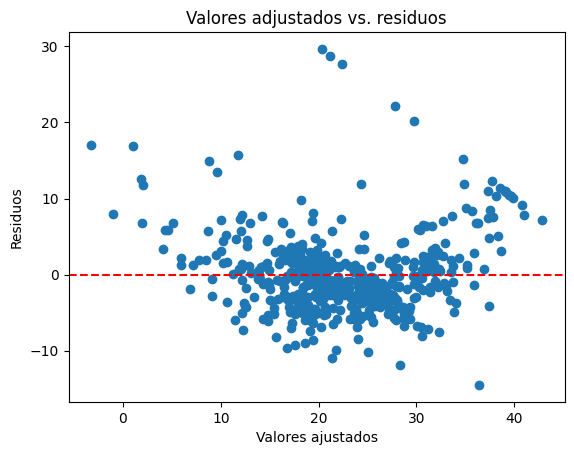

In [68]:
plt.scatter(model.fittedvalues, model.resid)
plt.xlabel("Valores ajustados")
plt.ylabel("Residuos")
plt.title("Valores adjustados vs. residuos")
plt.axhline(0, color='red', linestyle='--')
plt.show()

Hay un patron no son homocedasticos

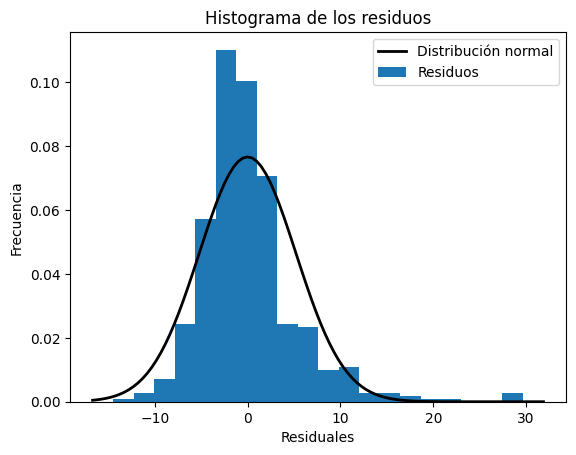

In [69]:
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np

from scipy.stats import norm

# Histograma de residuos
plt.hist(model.resid, bins=20, density=True)
# Ajustamos una curva normal a esos residuos
mu, std = norm.fit(model.resid)
# Graficamos la curva de la distribución normal
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)

plt.xlabel("Residuales")
plt.ylabel("Frecuencia")
plt.title("Histograma de los residuos")
plt.legend(["Distribución normal", "Residuos"])
plt.show()

El modelo no sirve, los residuos no son normales ni homocedasticos.

### ```TODAS SLECCIONADAS```

In [70]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm

# Separar la variable objetivo (MedHouseVal) de las variables predictoras
X = copy_dataset.drop(['MEDV'],axis=1)
y = copy_dataset['MEDV']

# Estandarizar las variables predictoras
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
# Metamoslo en un dataframe así no perdemos los nombres de las columnas
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

In [71]:
# Agregamos una constante como característica, para estimar la ordenada al origen
X_scaled_df_ = sm.add_constant(X_scaled_df)
# Ajustamos el modelo
model = sm.OLS(y, X_scaled_df_).fit()
# Imprimimos el resumen de los resultados
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Wed, 13 Nov 2024   Prob (F-statistic):          6.72e-135
Time:                        11:26:08   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         22.5328      0.211    106.814      0.0

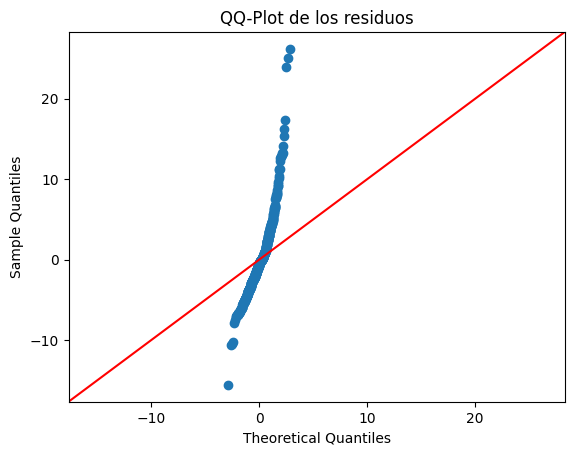

In [72]:
# QQ-Plot
sm.qqplot(model.resid, line='45')
plt.title("QQ-Plot de los residuos")
plt.show()

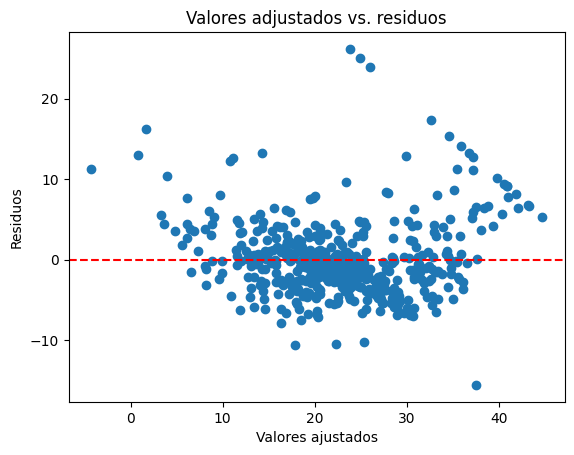

In [73]:
plt.scatter(model.fittedvalues, model.resid)
plt.xlabel("Valores ajustados")
plt.ylabel("Residuos")
plt.title("Valores adjustados vs. residuos")
plt.axhline(0, color='red', linestyle='--')
plt.show()

MAS O MENOS HAY COMO UNA RECTA A LA IZQUIERDA

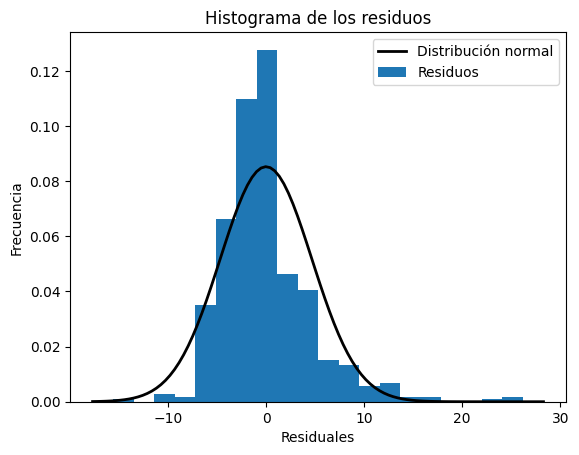

In [74]:
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np

from scipy.stats import norm

# Histograma de residuos
plt.hist(model.resid, bins=20, density=True)
# Ajustamos una curva normal a esos residuos
mu, std = norm.fit(model.resid)
# Graficamos la curva de la distribución normal
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)

plt.xlabel("Residuales")
plt.ylabel("Frecuencia")
plt.title("Histograma de los residuos")
plt.legend(["Distribución normal", "Residuos"])
plt.show()

DIO MEJOR R2 PERO SIGUE SIN SER NORMAL Y HOMOCEDASTICIDAD EN DUDA

# ```REGRESION EN LIFE EXPECTANCY```

## ```PRE PROCESAMIENTO```

In [75]:
#from sklearn.cluster import KMeans
import wget
import pandas as pd

from os import path

# inicializamos un diccionario donde guardaremos el dataset
dataset = dict()
dataset['url'] = 'https://ignaciorlando.github.io/datasets/data-science/Life-Expectancy-Data-Updated.csv'
dataset['extension'] = '.csv'
dataset['filename'] = 'life_expectancy' + dataset['extension']
if not path.exists(dataset['filename']):  # descargar solamente si no existe
  wget.download(dataset['url'], dataset['filename'])
else:
  print('El archivo {} ya existe.'.format(dataset['filename']))

# accedemos a los datos usando Pandas
original_table = pd.read_table(dataset['filename'],sep=',')
original_table.head()

El archivo life_expectancy.csv ya existe.


,Country,Region,Year,Infant_deaths,Under_five_deaths,Adult_mortality,Alcohol_consumption,Hepatitis_B,Measles,BMI,...,Diphtheria,Incidents_HIV,GDP_per_capita,Population_mln,Thinness_ten_nineteen_years,Thinness_five_nine_years,Schooling,Economy_status_Developed,Economy_status_Developing,Life_expectancy
0,Turkiye,Middle East,2015,11.1,13.0,105.8240,1.32,97,65,27.8,...,97,0.08,11006,78.53,4.9,4.8,7.8,0,1,76.5
1,Spain,European Union,2015,2.7,3.3,57.9025,10.35,97,94,26.0,...,97,0.09,25742,46.44,0.6,0.5,9.7,1,0,82.8
2,India,Asia,2007,51.5,67.9,201.0765,1.57,60,35,21.2,...,64,0.13,1076,1183.21,27.1,28.0,5.0,0,1,65.4
3,Guyana,South America,2006,32.8,40.5,222.1965,5.68,93,74,25.3,...,93,0.79,4146,0.75,5.7,5.5,7.9,0,1,67.0
4,Israel,Middle East,2012,3.4,4.3,57.9510,2.89,97,89,27.0,...,94,0.08,33995,7.91,1.2,1.1,12.8,1,0,81.7


In [76]:
#Hagamos una copia
copy_dataset =  original_table.copy()
#Quedemonos con los datos de 2012
copy_dataset = copy_dataset[copy_dataset['Year'] == 2015]

In [77]:
#Analicemos valores por si hay y hay y los borramos
copy_dataset = copy_dataset.dropna(axis=1)
#Hya columnas que se pueden obviar
copy_dataset['Developed'] = 0
copy_dataset['Developed'] = copy_dataset['Economy_status_Developed'].apply(lambda x: 1 if x == 1 else 0)
copy_dataset = copy_dataset.drop('Economy_status_Developed', axis=1)
copy_dataset = copy_dataset.drop('Economy_status_Developing', axis=1)

In [78]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
#Estandarizamos
# Seleccionamos las columnas numéricas para la normalización
numeric_cols = copy_dataset.select_dtypes(include=np.number).columns

# Creamos un objeto MinMaxScaler
scaler = MinMaxScaler()

# Ajustamos el scaler a los datos y transformamos los datos
copy_dataset[numeric_cols] = scaler.fit_transform(copy_dataset[numeric_cols])

# Imprimimos el DataFrame con los datos normalizados
copy_dataset.head()

,Country,Region,Year,Infant_deaths,Under_five_deaths,Adult_mortality,Alcohol_consumption,Hepatitis_B,Measles,BMI,Polio,Diphtheria,Incidents_HIV,GDP_per_capita,Population_mln,Thinness_ten_nineteen_years,Thinness_five_nine_years,Schooling,Life_expectancy,Developed
0,Turkiye,Middle East,0.0,0.099678,0.077592,0.121614,0.078947,0.974026,0.564103,0.629310,0.967742,0.975904,0.004899,0.101754,0.056850,0.180451,0.172794,0.503937,0.778116,0.0
1,Spain,European Union,0.0,0.009646,0.007252,0.018355,0.619019,0.974026,0.935897,0.474138,0.967742,0.975904,0.005598,0.241888,0.033593,0.018797,0.014706,0.653543,0.969605,1.0
6,Russian Federation,Rest of Europe,0.0,0.051447,0.042785,0.374099,0.482057,0.974026,0.974359,0.491379,0.967742,0.975904,0.004899,0.085654,0.104372,0.082707,0.080882,0.834646,0.617021,0.0
27,Cameroon,Africa,0.0,0.591640,0.621465,0.626477,0.272129,0.805195,0.551282,0.327586,0.645161,0.819277,0.077677,0.010242,0.016822,0.206767,0.198529,0.370079,0.203647,0.0
43,"Gambia, The",Africa,0.0,0.406217,0.416969,0.457501,0.160885,0.974026,0.551282,0.293103,0.951613,0.975904,0.066480,0.003376,0.001450,0.270677,0.261029,0.157480,0.303951,0.0


## ```CLUSTERING```

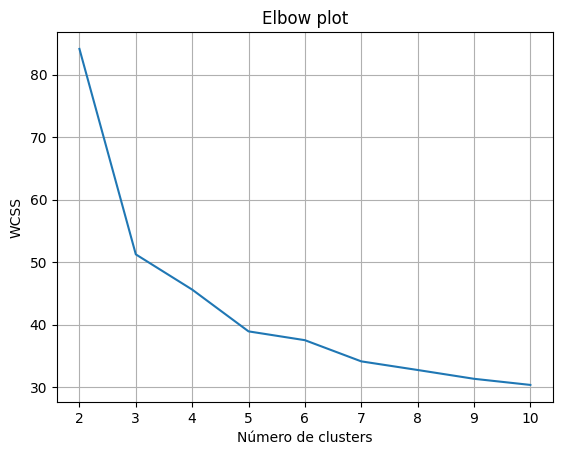

In [79]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
# separamos las features de los nombres de los países
countries = copy_dataset['Country']
features_data_2015 = copy_dataset.drop(columns=['Country', 'Year', 'Region'])

wcss = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=10)
    kmeans.fit(features_data_2015)
    wcss.append(kmeans.inertia_)

# graficamos el elbow plot
plt.plot(range(2, 11), wcss)
plt.title('Elbow plot')
plt.grid("True")
plt.xlabel('Número de clusters')
plt.ylabel('WCSS')
plt.show()

In [80]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
# inicializamos un objeto de la clase KMeans con el modelo
kmeans = KMeans(n_clusters=5, verbose=0, random_state=10)
# lo aplicamos sobre nuestros datos para hallar los centroides
kmeans.fit(features_data_2015)
# y obtenemos los clusters a los que fueron asignadas las muestras
clusters_kmeans_5 = kmeans.predict(features_data_2015)
print(clusters_kmeans_5)

[4 2 4 3 1 4 4 3 2 1 1 1 2 1 3 4 3 0 4 2 2 3 4 0 1 4 3 2 0 4 4 2 3 4 0 4 4
 4 1 4 2 4 4 3 4 1 2 4 4 1 1 4 2 1 1 2 3 0 4 4 4 1 1 4 3 4 4 2 4 1 4 4 1 4
 3 1 2 3 4 4 2 4 2 3 4 2 4 4 2 1 4 4 4 2 4 1 1 1 2 1 4 2 4 2 2 4 2 0 4 3 3
 1 4 4 4 0 4 4 2 3 4 1 3 4 4 4 2 3 2 1 4 0 4 4 2 2 4 4 0 1 2 3 2 4 4 4 0 2
 4 2 4 1 2 4 1 2 1 2 0 2 3 3 1 4 1 4 3 0 4 1 2 4 4 0 4 4 1 4 4]


In [81]:
import pandas as pd

# Creamos un DataFrame con los países y los clusters asignados
cluster_df = pd.DataFrame({'Country': countries, 'Cluster': clusters_kmeans_5})

# Imprimimos los países de cada cluster
for cluster_num in range(5):
  print(f"\nCluster {cluster_num}:")
  print(cluster_df[cluster_df['Cluster'] == cluster_num]['Country'].tolist())


Cluster 0:
['Ukraine', 'Iraq', 'Indonesia', 'Kiribati', 'Syrian Arab Republic', 'Guatemala', 'Micronesia, Fed. Sts.', 'Papua New Guinea', 'Vanuatu', 'Suriname', 'Philippines', 'Samoa', 'South Africa']

Cluster 1:
['Gambia, The', 'Vietnam', 'Eswatini', 'Botswana', 'Nepal', 'Guinea-Bissau', 'Eritrea', 'India', 'Malawi', 'Myanmar', 'Burundi', 'Mozambique', 'Tanzania', 'Gabon', 'Comoros', 'Uganda', 'Ghana', 'Senegal', 'Congo, Rep.', 'Namibia', 'Zimbabwe', 'Kenya', 'Zambia', 'Bangladesh', 'Rwanda', 'Cambodia', 'Bhutan', 'Lao PDR', 'Togo', 'Burkina Faso', 'Timor-Leste', 'Ethiopia', 'Djibouti']

Cluster 2:
['Spain', 'Norway', 'Latvia', 'Israel', 'New Zealand', 'Sweden', 'Czechia', 'Canada', 'Lithuania', 'Netherlands', 'Bulgaria', 'Portugal', 'Finland', 'Slovenia', 'Belgium', 'Japan', 'Slovak Republic', 'Austria', 'Malta', 'Greece', 'Ireland', 'Croatia', 'Switzerland', 'United Kingdom', 'Germany', 'Denmark', 'Poland', 'Italy', 'Hungary', 'Australia', 'Luxembourg', 'United States', 'Cyprus', '

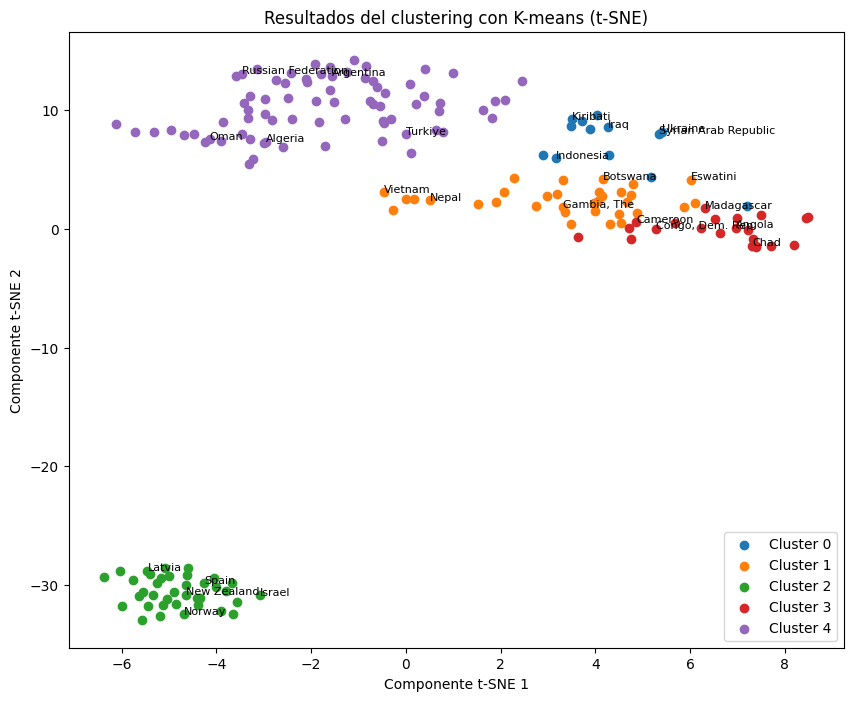

In [82]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# Reducir la dimensionalidad de los datos usando t-SNE
tsne = TSNE(n_components=2, random_state=42)
tsne_results = tsne.fit_transform(features_data_2015)

# Crear un DataFrame con los resultados de t-SNE y los clusters
tsne_df = pd.DataFrame({'x': tsne_results[:, 0], 'y': tsne_results[:, 1], 'Cluster': clusters_kmeans_5, 'Country': countries})

# Graficar los resultados de t-SNE, coloreando los puntos según el cluster
plt.figure(figsize=(10, 8))
for cluster_num in range(5):
  plt.scatter(tsne_df[tsne_df['Cluster'] == cluster_num]['x'], tsne_df[tsne_df['Cluster'] == cluster_num]['y'], label=f'Cluster {cluster_num}')

  # Seleccionar 5 países para etiquetar en cada cluster, incluyendo Argentina si está presente
  countries_to_label = tsne_df[tsne_df['Cluster'] == cluster_num]['Country'].tolist()
  if 'Argentina' in countries_to_label:
    countries_to_label.remove('Argentina')
    countries_to_label = ['Argentina'] + countries_to_label[:4]
  else:
    countries_to_label = countries_to_label[:5]

  for country in countries_to_label:
    row = tsne_df[(tsne_df['Cluster'] == cluster_num) & (tsne_df['Country'] == country)]
    if not row.empty:
      plt.text(row['x'].values[0], row['y'].values[0], country, fontsize=8)

plt.xlabel('Componente t-SNE 1')
plt.ylabel('Componente t-SNE 2')
plt.title('Resultados del clustering con K-means (t-SNE)')
plt.legend()
plt.show()

In [85]:
features_data_2015['Cluster'] = clusters_kmeans_5
cluster0 = features_data_2015[features_data_2015['Cluster'] == 0].reset_index(drop=True)
cluster1 = features_data_2015[features_data_2015['Cluster'] == 1]
cluster2 = features_data_2015[features_data_2015['Cluster'] == 2]
cluster3 = features_data_2015[features_data_2015['Cluster'] == 3]
cluster4 = features_data_2015[features_data_2015['Cluster'] == 4].reset_index(drop=True)

## ```REGRESION LINEAL MULTIPLE```

### ```CLUSTER 4 LOS MAS O MENOS```

In [89]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm

# Separar la variable objetivo (MedHouseVal) de las variables predictoras
X = cluster4.drop(['Life_expectancy','Cluster','Developed'], axis=1)
y = cluster4['Life_expectancy']

# Estandarizar las variables predictoras
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
# Metamoslo en un dataframe así no perdemos los nombres de las columnas
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)
# Agregamos una constante como característica, para estimar la ordenada al origen
X_scaled_df_ = sm.add_constant(X_scaled_df)
# Ajustamos el modelo
model = sm.OLS(y, X_scaled_df_).fit()
# Imprimimos el resumen de los resultados
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:        Life_expectancy   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.789
Method:                 Least Squares   F-statistic:                     19.24
Date:                Wed, 13 Nov 2024   Prob (F-statistic):           3.60e-17
Time:                        11:28:54   Log-Likelihood:                 138.61
No. Observations:                  74   AIC:                            -245.2
Df Residuals:                      58   BIC:                            -208.4
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

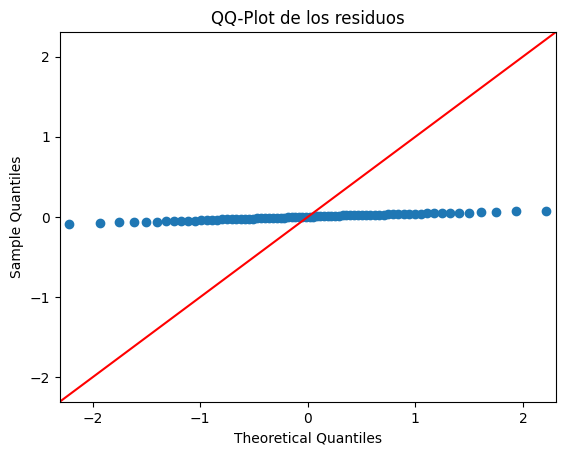

In [90]:
# QQ-Plot
sm.qqplot(model.resid, line='45')
plt.title("QQ-Plot de los residuos")
plt.show()

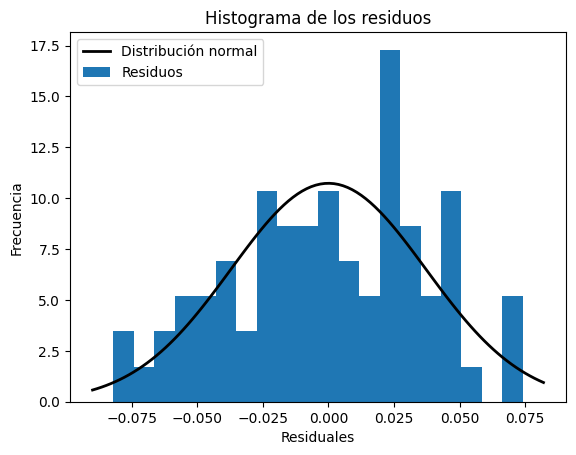

In [91]:
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np

from scipy.stats import norm

# Histograma de residuos
plt.hist(model.resid, bins=20, density=True)
# Ajustamos una curva normal a esos residuos
mu, std = norm.fit(model.resid)
# Graficamos la curva de la distribución normal
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)

plt.xlabel("Residuales")
plt.ylabel("Frecuencia")
plt.title("Histograma de los residuos")
plt.legend(["Distribución normal", "Residuos"])
plt.show()

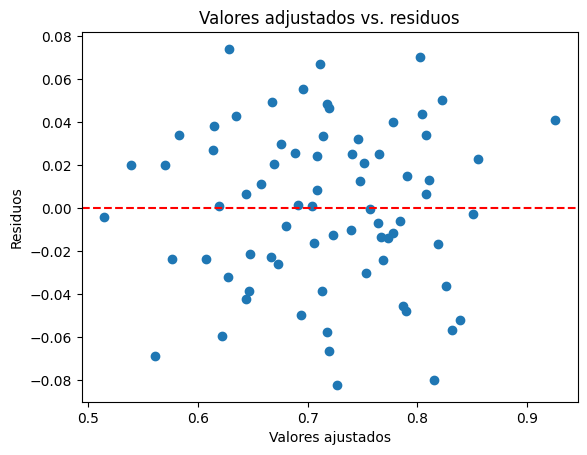

In [92]:
plt.scatter(model.fittedvalues, model.resid)
plt.xlabel("Valores ajustados")
plt.ylabel("Residuos")
plt.title("Valores adjustados vs. residuos")
plt.axhline(0, color='red', linestyle='--')
plt.show()

# ```CORRECCIONES CALIFORNIA```

In [93]:
from sklearn import datasets

# esta instrucción descarga el dataset usando sklearn, en formato de dataframe de pandas
dataset = datasets.fetch_california_housing(as_frame=True)

# el resultado es un diccionario, que en el campo DESCR trae la descripción del dataset
print(dataset["DESCR"])

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

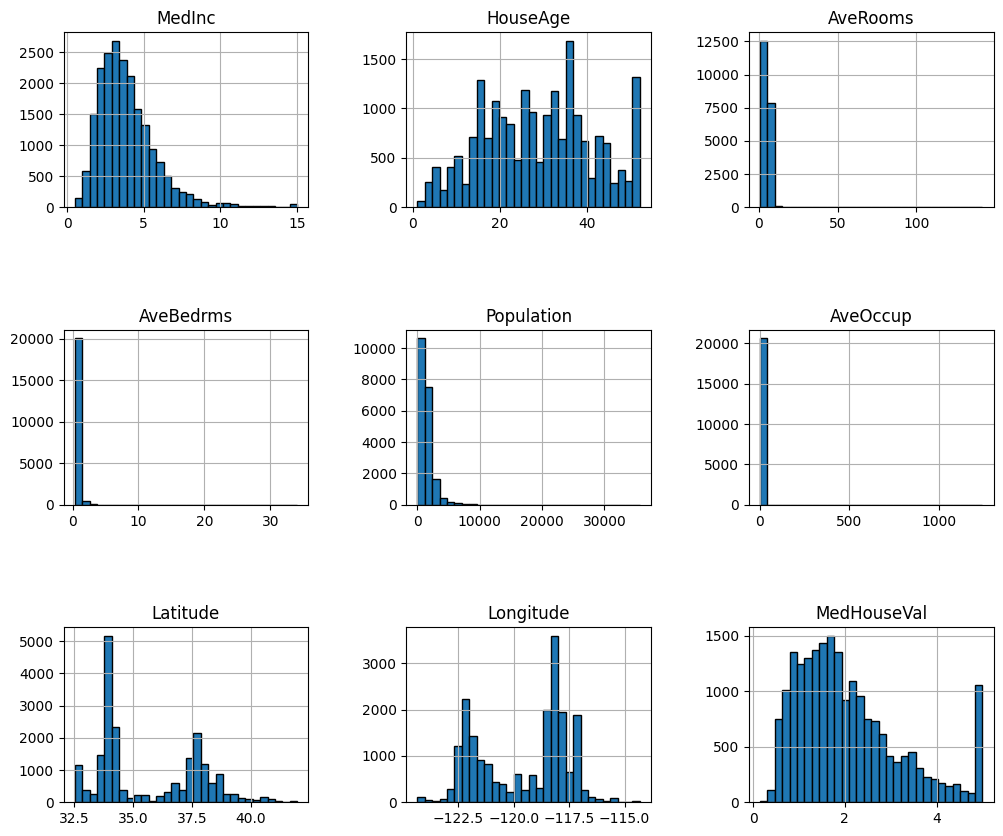

In [94]:
import matplotlib.pyplot as plt

# construimos una serie de histogramas mostrando la distribución de las features
dataset.frame.hist(figsize=(12, 10), bins=30, edgecolor="black")
plt.subplots_adjust(hspace=0.7, wspace=0.4)

Podriamos eliminar los valores outliers de MedHouseVal

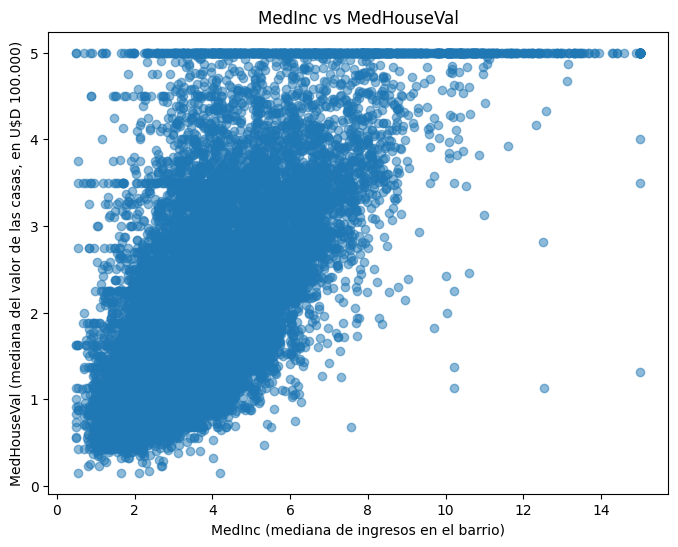

In [95]:
plt.figure(figsize=(8, 6))
plt.scatter(dataset.frame['MedInc'], dataset.frame['MedHouseVal'], alpha=0.5)
plt.xlabel('MedInc (mediana de ingresos en el barrio)')
plt.ylabel('MedHouseVal (mediana del valor de las casas, en U$D 100.000)')
plt.title('MedInc vs MedHouseVal')
plt.show()

In [98]:

dataset = dataset.frame

In [99]:
dataset = dataset[dataset['MedHouseVal'] < 5]

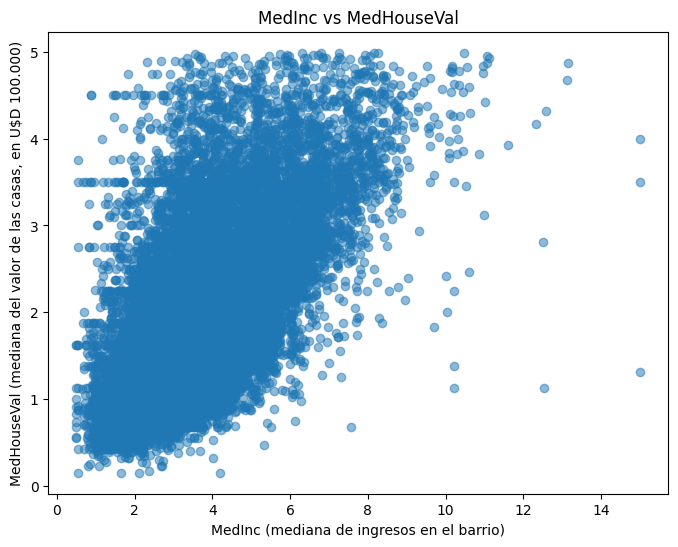

In [101]:
plt.figure(figsize=(8, 6))
plt.scatter(dataset['MedInc'], dataset['MedHouseVal'], alpha=0.5)
plt.xlabel('MedInc (mediana de ingresos en el barrio)')
plt.ylabel('MedHouseVal (mediana del valor de las casas, en U$D 100.000)')
plt.title('MedInc vs MedHouseVal')
plt.show()

In [103]:
dataset = dataset[dataset['AveOccup'] < 50]
dataset = dataset[dataset['Population'] < 10000]
dataset = dataset[dataset['AveBedrms'] < 5]
dataset = dataset[dataset['AveRooms'] < 10]


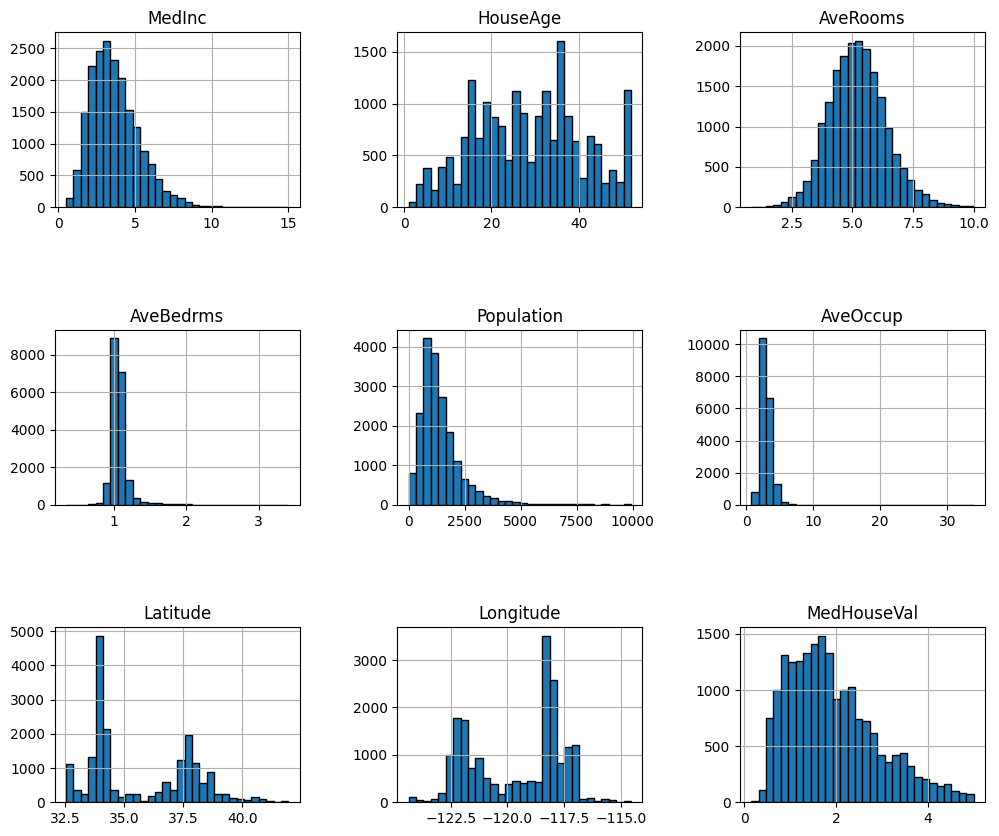

In [104]:
import matplotlib.pyplot as plt

# construimos una serie de histogramas mostrando la distribución de las features
dataset.hist(figsize=(12, 10), bins=30, edgecolor="black")
plt.subplots_adjust(hspace=0.7, wspace=0.4)

In [105]:
dataset = dataset[dataset['AveOccup'] < 10]
dataset = dataset[dataset['Population'] < 5000]
dataset = dataset[dataset['AveBedrms'] < 2.5]
dataset = dataset[dataset['MedInc'] < 12]

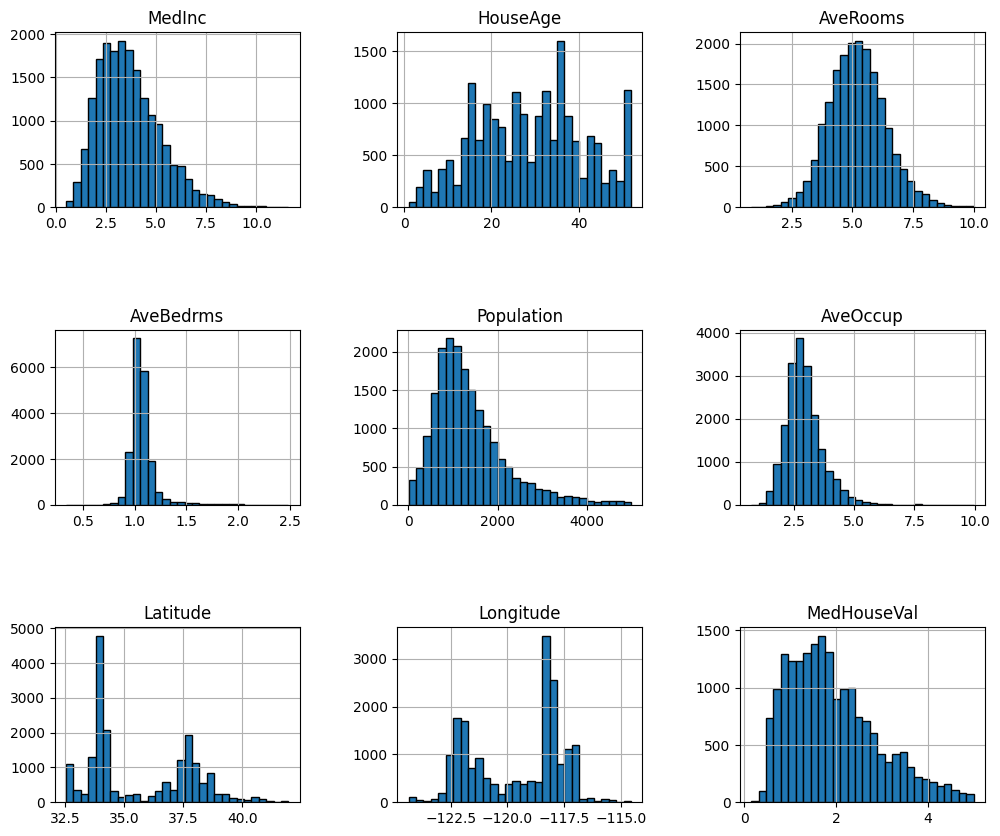

In [106]:
import matplotlib.pyplot as plt

# construimos una serie de histogramas mostrando la distribución de las features
dataset.hist(figsize=(12, 10), bins=30, edgecolor="black")
plt.subplots_adjust(hspace=0.7, wspace=0.4)

In [111]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Separar la variable objetivo (MedHouseVal) de las variables predictoras
X = dataset.drop('MedHouseVal', axis=1)
y = dataset['MedHouseVal']

y = y.reset_index(drop=True)
X = X.reset_index(drop=True)

# Estandarizar las variables predictoras
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
# Metamoslo en un dataframe así no perdemos los nombres de las columnas
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

In [112]:
# Agregamos una constante como característica, para estimar la ordenada al origen
X_scaled_df_ = sm.add_constant(X_scaled_df)
# Ajustamos el modelo
model = sm.OLS(y, X_scaled_df_).fit()
# Imprimimos el resumen de los resultados
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            MedHouseVal   R-squared:                       0.634
Model:                            OLS   Adj. R-squared:                  0.633
Method:                 Least Squares   F-statistic:                     4126.
Date:                Wed, 13 Nov 2024   Prob (F-statistic):               0.00
Time:                        11:53:06   Log-Likelihood:                -16987.
No. Observations:               19093   AIC:                         3.399e+04
Df Residuals:                   19084   BIC:                         3.406e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.9239      0.004    451.198      0.0

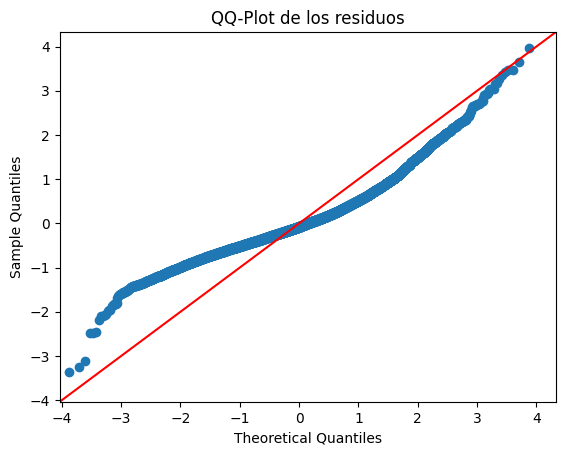

In [113]:
# QQ-Plot
sm.qqplot(model.resid, line='45')
plt.title("QQ-Plot de los residuos")
plt.show()

In [114]:
from scipy.stats import shapiro

# aplicamos Shapiro-Wilk sobre los residuos
_, p = shapiro(model.resid)
print("p = %.4f" % (p))
# comparamos con el alpha
alpha = 0.05
if p > alpha:
    print("Se distribuyen normal (falló en rechazarse la hipótesis nula)")
else:
    print('No se distribuyen normal (se rechazó la hipótesis nula)')

p = 0.0000
No se distribuyen normal (se rechazó la hipótesis nula)


E:\FUNDAMENTO DE CIENCIA DE DATOS\PRACTICO 5\TPLInearRegression\.venv\Lib\site-packages\scipy\stats\_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 19093.
  res = hypotest_fun_out(*samples, **kwds)


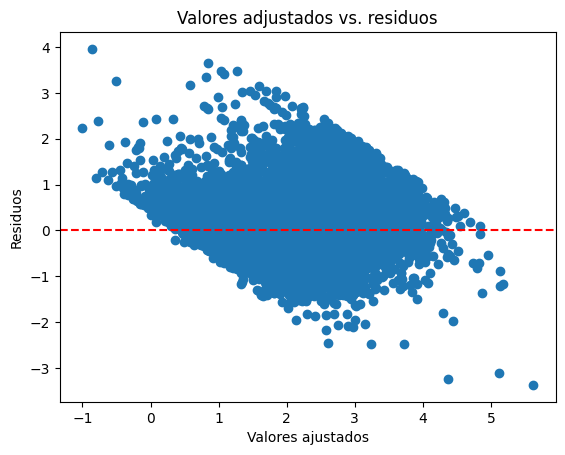

In [115]:
plt.scatter(model.fittedvalues, model.resid)
plt.xlabel("Valores ajustados")
plt.ylabel("Residuos")
plt.title("Valores adjustados vs. residuos")
plt.axhline(0, color='red', linestyle='--')
plt.show()

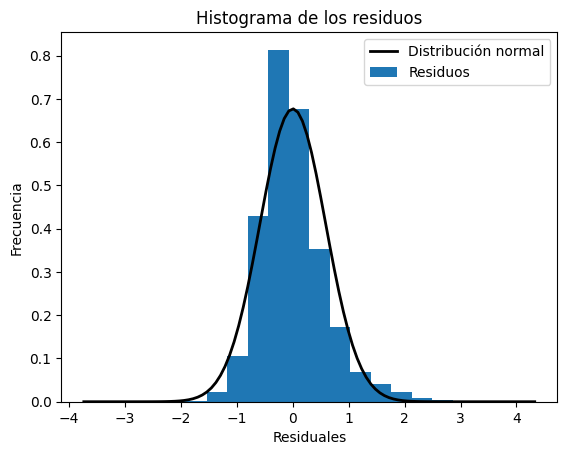

In [116]:
import matplotlib.pyplot as plt
import statsmodels.api as sm

from scipy.stats import norm

# Histograma de residuos
plt.hist(model.resid, bins=20, density=True)
# Ajustamos una curva normal a esos residuos
mu, std = norm.fit(model.resid)
# Graficamos la curva de la distribución normal
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)

plt.xlabel("Residuales")
plt.ylabel("Frecuencia")
plt.title("Histograma de los residuos")
plt.legend(["Distribución normal", "Residuos"])
plt.show()


No hay forma, no se arregla, la normalidad dio mucho mejor pero siguen sin ser homocedasticos los residuos.